<a href="https://colab.research.google.com/github/moxa16/intel_dataset_kaggle/blob/master/intel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# notes

## key points google colab

- '!' -> exclamation mark prepended executes linux bash  cmds 
-  By default most of the packages associated with ml are pre installed in google colab
- google colab free gpu , by google, saved auto on gdrive

## key points ML

- ML is an optimization problem - Finding the global minima (minimum loss) on an error surface # don't work about the keywords, will let you know.

## key point about keras

There are many frameworks available for ML - why ? for making it easy the execution of stuffs like calculating gradients, loss, optimization function etc. Examples - keras, tensorflow, mxnet, lua torch, pytorch, onnx, caffe, chainer, scikit learn etc...

- Keras is built on top of TF (tensorflow)
- Keras is used for rapid development + (positive)
- Keras has less felexibility than TF - (negative)
- keras has backends meaning it s built on something that does the computations of ML (as mentioned in in point 1 )
- keras most popularly used with backend TF, another example is Theano

okay letss try a bottom down approach

''#'' - means - comments 

**DAY 1 simple application of ml**

-	Neural Nets
there are many types of algos in ML, we will go with neural nets the most popular one first. with progression you will understand which algo to use with the right type of data. cool ?yes
- examination of the application.





Lets start with image classification 
----------------------------------------------------------

Kaggle download data via api
- step 1 : download the api token from your account 
- step 2 : copy the api download cmd from dataset to work on
- step 3 : write the download cmd in google colab
- - 3.1 : install kaggle package via pip , -U stands for user, -q stands for quiet...meaning installation will be run in background

- Running on google colab gpu 
- Training a keras model 



# set up 

look above right left connected to ram 13 gb but not gpu so we need to change that



In [0]:
! pip install -U -q kaggle

In [0]:
!mkdir --p ~/.kaggle
!echo '{"username":"moxa1610","key":"c4a18ced4ae4fc6b93d7ad18f529ffe3"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 338M/344M [00:03<00:00, 42.9MB/s]
100% 344M/344M [00:04<00:00, 89.6MB/s]


In [0]:
 !mkdir intel_data
 !unzip -q -d intel_data intel*.zip

In [0]:
# the folder contains more zip files need to extract that
!mkdir intel_data/train
!mkdir intel_data/test
!mkdir intel_data/pred

!unzip -q -d intel_data/train intel_data/seg_train.zip
!unzip -q -d intel_data/test intel_data/seg_test.zip
!unzip -q -d intel_data/pred intel_data/seg_pred.zip


Now, dividing the process in three steps

- Data processing : Visz, data count and all that stuff
- Building a model in keras
- Training a model and saving it

# Data processing


In [0]:
# first we need to check what exactly is the data
# okay since it is already split in train - test - validation format we need not split again
# the dataset contains of satellite images of the classes - buildings - forest 
# lets viz it ...psst ! VIZ means visualization in datascience lingo 


# for vizing it we will use matplotlib 

import matplotlib.pyplot as plt
import glob

In [0]:
train_path = 'intel_data/train/seg_train/*/*' # * - means all the files including in it 
test_path = 'intel_data/test/seg_test/*/*'

train_files = glob.glob(train_path)
test_files = glob.glob(test_path)

In [0]:
train_files[:5] # viewing first five elements in trainfiles list

['intel_data/train/seg_train/mountain/2428.jpg',
 'intel_data/train/seg_train/mountain/9045.jpg',
 'intel_data/train/seg_train/mountain/17529.jpg',
 'intel_data/train/seg_train/mountain/14804.jpg',
 'intel_data/train/seg_train/mountain/16675.jpg']

what is glob ?

glob is a package that helps in reading files from the disk on the fly....similar functions can be found in the os package called as os.walk(dir_path)

In [0]:
test_files[:5]

['intel_data/test/seg_test/mountain/22051.jpg',
 'intel_data/test/seg_test/mountain/22124.jpg',
 'intel_data/test/seg_test/mountain/20181.jpg',
 'intel_data/test/seg_test/mountain/20435.jpg',
 'intel_data/test/seg_test/mountain/20512.jpg']

In [0]:
# now to view them 
# lets shuffle them first

import numpy as np


In [0]:
np.random.seed(0) # setting the seed means telling the random number generator to remember from where the number was generated during this execution of experiment 
np.random.shuffle(train_files) # shuffles a list / array , returns nothing
np.random.shuffle(test_files)

In [0]:
train_files[:5]

['intel_data/train/seg_train/glacier/11350.jpg',
 'intel_data/train/seg_train/mountain/8365.jpg',
 'intel_data/train/seg_train/forest/19110.jpg',
 'intel_data/train/seg_train/forest/5754.jpg',
 'intel_data/train/seg_train/sea/4433.jpg']

why shuffle ? 

check the train_files[:5 ] done at the first time, lets see your obs skill ???

image are from different folders nw 

intel_data/train/seg_train/glacier/11350.jpg
intel_data/train/seg_train/mountain/8365.jpg
intel_data/train/seg_train/forest/19110.jpg
intel_data/train/seg_train/forest/5754.jpg
intel_data/train/seg_train/sea/4433.jpg
intel_data/train/seg_train/street/6180.jpg
intel_data/train/seg_train/glacier/14325.jpg
intel_data/train/seg_train/buildings/11796.jpg
intel_data/train/seg_train/glacier/9322.jpg
intel_data/train/seg_train/sea/15249.jpg


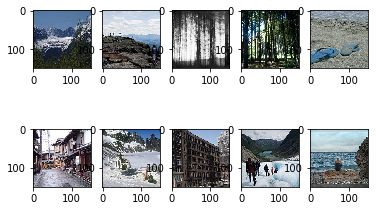

In [0]:
# plotting the first 10 images from train  files

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(plt.imread(train_files[i]))
  print(train_files[i])
plt.show()

In [0]:
# so these are the images in the dataset with respective classes (classes here are name of the folder indicating type of the image)

# now we need to make a way to load the image directly from the disk with out storing the images in ram as gpu ram is expensive than disk space.

# for that keras has a convenient class method

# this type of method is called as online learning in practisce.


import keras

Using TensorFlow backend.


In [0]:
# always refer to https://keras.io/ for class and methods implemented in keras


# now thers is something called as data augmentation, it means do change the data (images) to input varitation example...flipping the image, blurring, rotation, shear, zoom, whitening and so on

# augmentation helps in better learning of the model since variation adds noise and more patterns for the model to learn from.

# but caution: augmentation should be used in cases where data is too low, if data is already noisy augmentation will make it worse, with experience you will know when exactly to use it.

# there are two types of augmentation - qualitative and quantitative.manipulating image persception is qualitative as mentioned in the above function (shear, rotation etc), increasing the number is quantitative.


# here we will look into qualitative

# lets check the samples first

len(train_files)

14034

In [0]:
# 14034 total images not bad.

# there is a case called as imbalanced data, meaning every sample corresponding to each class is unequal (layman every folder building, glacier etc has unequal number of samples.)
# imbalanced data causes model to learn the data more which has highest samples, therby leading to misclassification.

# we will look into imbalanced data on some other day

# now, creating a generator-  in general generator allow us to iterate through dataset in specific size of batches. such style is known as batch training

# lets create a generator

from keras.preprocessing.image import ImageDataGenerator

what exactly is your doubt here ask please

1) why have you done data augmentation, as in, how will augmenting the data help to classify images?
ans : gave live example
2) what is the use of validation_aug object?
ans:  to work on validation set, just rescaling it ok

In [0]:
# train augmentation generator object #this part
train_aug = ImageDataGenerator(
    rotation_range=45,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.3,
    height_shift_range=0.3,
    rescale=1./255
)

# validation augmentation generator object 
validation_aug = ImageDataGenerator(
    rescale=1./255
)

# we generally apply augmentation to train set only

# here we will use flow from directory method of the class object defined earlier.


train_gen = train_aug.flow_from_directory(
    'intel_data/train/seg_train',
    target_size=(64, 64),
    batch_size=128,
    class_mode='categorical'
)


validation_gen = validation_aug.flow_from_directory(
    'intel_data/test/seg_test',
    target_size=(64, 64),
    batch_size=128,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
# see it automatcally finds out the number of classes as per the folders 
train_gen.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [0]:
# {'buildings' -> 0, 'forest' -> 1, 'glacier' -> 2, 'mountain' -> 3, 'sea' -> 4, 'street' -> 5 }

# will map the classes and store the dictionary

tg_names = {'buildings': 0, 'forest' : 1, 'glacier' : 2, 'mountain' : 3, 'sea': 4, 'street': 5 }

# model 

We will work on the following

- custom CNN model
- Transfer learning

## custom cnn model

CNN  are pretty famous for image classificaiton task. 

We need CNN for extracting the features (pixels of image that represents a particular area in the image. )

Convolution means unfoldind, so imagine an image, imagine a particular region, lets say 3x3 box, zoom it and you will get a box from which many more times the images will be zoomed or unfolded..


In [0]:
# lets build a model

# import all necesaary layers to build CNN from keras

# i will explain what 1D and 2D is when we do the video call

from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Activation, Dropout, Input
from keras.optimizers import Adam
from keras.models import Model
 
# you can build models in keras in two types : sequential and functional, meaning sequential is like stack of layers like stack of cards, functional is like directed acyclic graph
# we will look into the functional type here 
def build_model():
  """Function to build the model"""
  # first layer should be an input layer
  input_ = Input(shape=(64, 64, 3), name="input_1") # shape is telling the  layer to open its mouth in so much width that this much food it can take.
  # every image is 3 dimensional, 3 at the end of (64 ,64, 3) says its 3 channels meaning 3 colors RGB. if grayscale (b/w) then it would be 1
  # 64 - 64 corresponds to its width an height
  
  x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding="same", name="conv_1")(input_) #  you will understand it in video call filters kernels and padding
  # since this is an functional api we treat every layer as a functional  input to the next layer 
  x = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), name="maxpool_1")(x)
  x = Activation('relu')(x)
  
  x1 = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', name="conv_parallel_1")(input_) # this is a parallel branch
  x1 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), name="maxpool_parallel_1")(x1) 
  x1 = Activation('relu', name="activation_parallel_1")(x1)
  
  x = keras.layers.Concatenate(name="merge_layer_1")([x, x1]) # this layer merges the branches
  
  
  for i in range(10):
    x = Conv2D(32 * i + 32, kernel_size=(3, 3), strides=(1, 1),padding='same',name="conv_{}".format(i + 2))(x) # every layer name you mentioned must be unique
    x = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), name="maxpool_{}".format(i+2))(x)
    
    if i % 2 == 0:
      x = Activation('relu')(x) # applying activation on every even layers, if  you do not name the layers it will automatically create one for you
    if i % 5 == 0:
      x = Dropout(0.3, name="dropout_{}".format(i+2+5))(x) # this layer forgets a certain amount of data inoder for the data to learn better concepts associated with it are regularization , ensemble methods
  
    
  x = Flatten(name="flatt")(x) # this layer flats all the dimensions and combines into 1 dimenion
  prediction_layer = Dense(6, name="prediction")(x)
  prediction_layer = Activation('softmax', name="activation_final")(prediction_layer)
  
  
  model = Model(
      inputs=[input_],
      outputs=[prediction_layer]
  )
  # this is how you combine everything. 
  opt = Adam(lr=1e-3, decay=1e-3/128)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model
  

In [0]:
model = build_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv_parallel_1 (Conv2D)        (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
maxpool_1 (MaxPooling2D)        (None, 31, 31, 32)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
maxpool_pa

In [0]:
# i will explain in call what parameters are actually

from keras.utils import plot_model
plot_model(model, to_file='model.png')


## training the model

In [49]:
h = model.fit_generator(
    train_gen,
    epochs=20,
    steps_per_epoch=len(train_gen),
    verbose=2
)

# epochs means the number of times you are making the model to see the entire data
# steps means th number fot imes you are asking to update the parameters to the optimizer
# verbose means while the training the decription to be shown, 0 - measns none , 1 - elaborate, 2 - concise




Epoch 1/20
 - 29s - loss: 1.7967 - acc: 0.1753
Epoch 2/20
 - 29s - loss: 1.7965 - acc: 0.1736
Epoch 3/20
 - 29s - loss: 1.7953 - acc: 0.1728
Epoch 4/20
 - 29s - loss: 1.7990 - acc: 0.1749
Epoch 5/20
 - 29s - loss: 1.7965 - acc: 0.1777
Epoch 6/20
 - 29s - loss: 1.7950 - acc: 0.1715
Epoch 7/20
 - 29s - loss: 1.7941 - acc: 0.1829
Epoch 8/20
 - 29s - loss: 1.7937 - acc: 0.1767
Epoch 9/20
 - 29s - loss: 1.7935 - acc: 0.1741
Epoch 10/20
 - 29s - loss: 1.7929 - acc: 0.1713
Epoch 11/20
 - 29s - loss: 1.7926 - acc: 0.1766
Epoch 12/20
 - 29s - loss: 1.7950 - acc: 0.1780
Epoch 13/20
 - 29s - loss: 1.7937 - acc: 0.1722
Epoch 14/20
 - 29s - loss: 1.7924 - acc: 0.1744
Epoch 15/20
 - 29s - loss: 1.7926 - acc: 0.1750
Epoch 16/20
 - 29s - loss: 1.7928 - acc: 0.1750
Epoch 17/20
 - 29s - loss: 1.7929 - acc: 0.1758
Epoch 18/20
 - 29s - loss: 1.7917 - acc: 0.1743
Epoch 19/20
 - 29s - loss: 1.7932 - acc: 0.1758
Epoch 20/20
 - 29s - loss: 1.7931 - acc: 0.1711
